In [ ]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import plotly.graph_objs as go
import plotly.figure_factory as ff
from plotly import tools
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
# init_notebook_mode(connected=True)
from collections import Counter

import gc
from datetime import datetime
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.metrics import roc_auc_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from catboost import CatBoostClassifier
from sklearn import svm
import lightgbm as lgb
from lightgbm import LGBMClassifier
import xgboost as xgb

/usr/local/lib/python3.10/dist-packages/dask/dataframe/__init__.py:42: FutureWarning:


Dask dataframe query planning is disabled because dask-expr is not installed.

You can install it with `pip install dask[dataframe]` or `conda install dask`.
This will raise in a future version.




In [ ]:
!pip install catboost


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.7/98.7 MB 8.5 MB/s eta 0:00:00


In [ ]:
fraud_df = pd.read_csv('/content/creditcard.csv')
fraud_df.shape

(284807, 31)

In [ ]:
fraud_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [ ]:
df = fraud_df.copy()

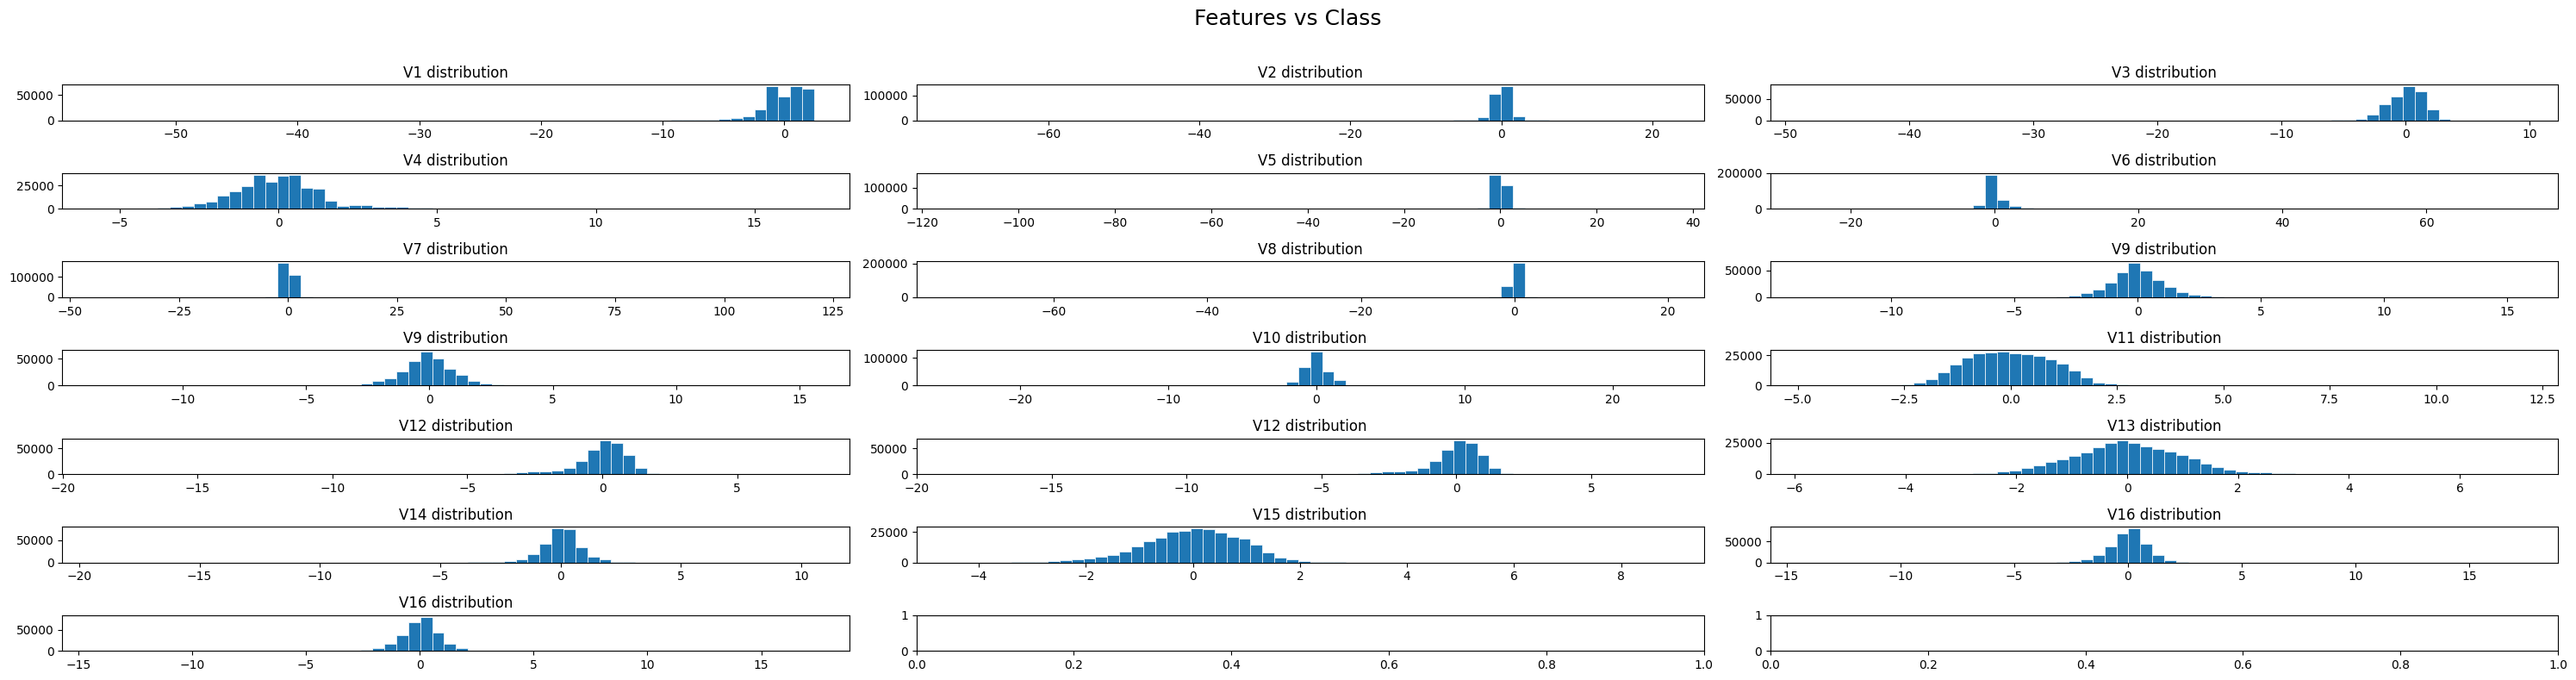

In [ ]:
fig, axes = plt.subplots(nrows=7, ncols=3,figsize=(30,8))
fig.suptitle('Features vs Class\n', size = 18)

axes[0,0].hist(df['V1'], bins=60, linewidth=0.5, edgecolor="white")
axes[0,0].set_title("V1 distribution");

axes[0,1].hist(df['V2'], bins=60, linewidth=0.5, edgecolor="white")
axes[0,1].set_title("V2 distribution");

axes[0,2].hist(df['V3'], bins=60, linewidth=0.5, edgecolor="white")
axes[0,2].set_title("V3 distribution");

axes[1,0].hist(df['V4'], bins=60, linewidth=0.5, edgecolor="white")
axes[1,0].set_title("V4 distribution");

axes[1,1].hist(df['V5'], bins=60, linewidth=0.5, edgecolor="white")
axes[1,1].set_title("V5 distribution");

axes[1,2].hist(df['V6'], bins=60, linewidth=0.5, edgecolor="white")
axes[1,2].set_title("V6 distribution");

axes[2,0].hist(df['V7'], bins=60, linewidth=0.5, edgecolor="white")
axes[2,0].set_title("V7 distribution");

axes[2,1].hist(df['V8'], bins=60, linewidth=0.5, edgecolor="white")
axes[2,1].set_title("V8 distribution");

axes[2,2].hist(df['V9'], bins=60, linewidth=0.5, edgecolor="white")
axes[2,2].set_title("V9 distribution");

axes[3,0].hist(df['V9'], bins=60, linewidth=0.5, edgecolor="white")
axes[3,0].set_title("V9 distribution");

axes[3,1].hist(df['V10'], bins=60, linewidth=0.5, edgecolor="white")
axes[3,1].set_title("V10 distribution");

axes[3,2].hist(df['V11'], bins=60, linewidth=0.5, edgecolor="white")
axes[3,2].set_title("V11 distribution");

axes[4,0].hist(df['V12'], bins=60, linewidth=0.5, edgecolor="white")
axes[4,0].set_title("V12 distribution");

axes[4,1].hist(df['V12'], bins=60, linewidth=0.5, edgecolor="white")
axes[4,1].set_title("V12 distribution");

axes[4,2].hist(df['V13'], bins=60, linewidth=0.5, edgecolor="white")
axes[4,2].set_title("V13 distribution");

axes[5,0].hist(df['V14'], bins=60, linewidth=0.5, edgecolor="white")
axes[5,0].set_title("V14 distribution");

axes[5,1].hist(df['V15'], bins=60, linewidth=0.5, edgecolor="white")
axes[5,1].set_title("V15 distribution");

axes[5,2].hist(df['V16'], bins=60, linewidth=0.5, edgecolor="white")
axes[5,2].set_title("V16 distribution");

axes[6,0].hist(df['V16'], bins=60, linewidth=0.5, edgecolor="white")
axes[6,0].set_title("V16 distribution");



plt.tight_layout()

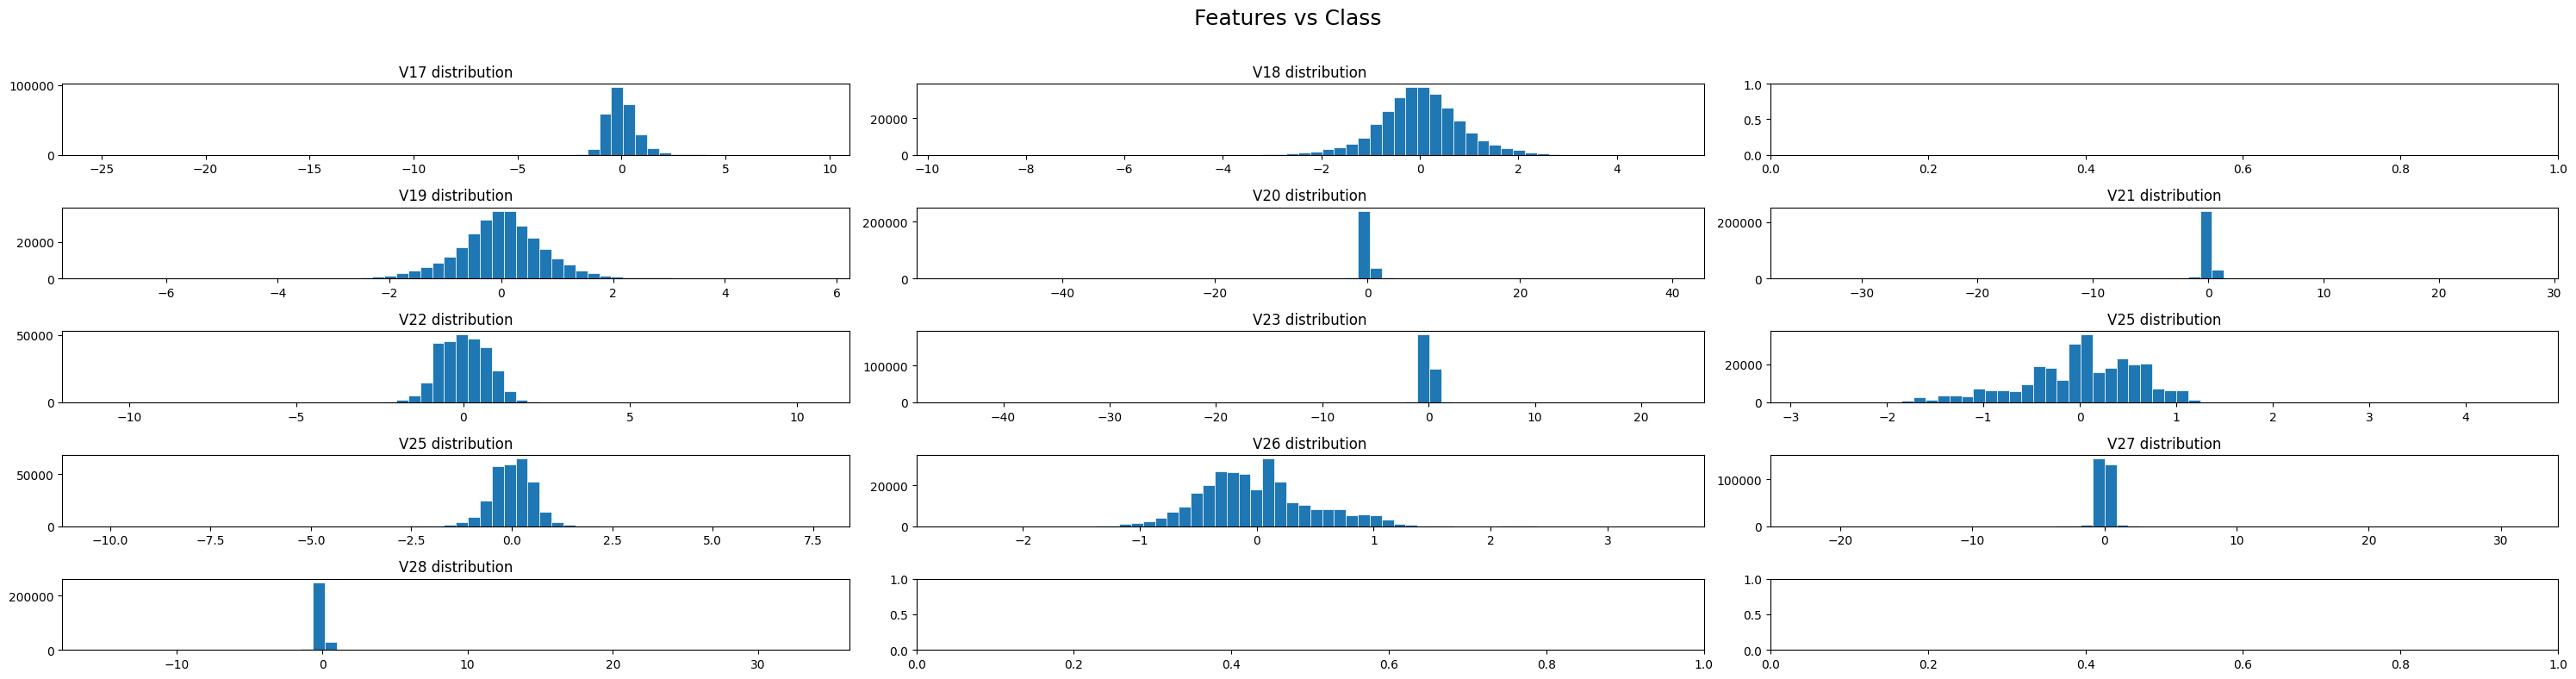

In [ ]:
fig, axes = plt.subplots(nrows=5, ncols=3,figsize=(30,8))
fig.suptitle('Features vs Class\n', size = 18)

axes[0,0].hist(df['V17'], bins=60, linewidth=0.5, edgecolor="white")
axes[0,0].set_title("V17 distribution");

axes[0,1].hist(df['V18'], bins=60, linewidth=0.5, edgecolor="white")
axes[0,1].set_title("V18 distribution");

axes[1,0].hist(df['V19'], bins=60, linewidth=0.5, edgecolor="white")
axes[1,0].set_title("V19 distribution");

axes[1,1].hist(df['V20'], bins=60, linewidth=0.5, edgecolor="white")
axes[1,1].set_title("V20 distribution");

axes[1,2].hist(df['V21'], bins=60, linewidth=0.5, edgecolor="white")
axes[1,2].set_title("V21 distribution");

axes[2,0].hist(df['V22'], bins=60, linewidth=0.5, edgecolor="white")
axes[2,0].set_title("V22 distribution");

axes[2,1].hist(df['V23'], bins=60, linewidth=0.5, edgecolor="white")
axes[2,1].set_title("V23 distribution");

axes[2,2].hist(df['V24'], bins=60, linewidth=0.5, edgecolor="white")
axes[2,2].set_title("V25 distribution");

axes[3,0].hist(df['V25'], bins=60, linewidth=0.5, edgecolor="white")
axes[3,0].set_title("V25 distribution");

axes[3,1].hist(df['V26'], bins=60, linewidth=0.5, edgecolor="white")
axes[3,1].set_title("V26 distribution");

axes[3,2].hist(df['V27'], bins=60, linewidth=0.5, edgecolor="white")
axes[3,2].set_title("V27 distribution");

axes[4,0].hist(df['V28'], bins=60, linewidth=0.5, edgecolor="white")
axes[4,0].set_title("V28 distribution");




plt.tight_layout()

In [ ]:
def IQR_method (df,n,features):
    """
    Takes a dataframe and returns an index list corresponding to the observations
    containing more than n outliers according to the Tukey IQR method.
    """
    outlier_list = []

    for column in features:

        # 1st quartile (25%)
        Q1 = np.percentile(df[column], 25)
        # 3rd quartile (75%)
        Q3 = np.percentile(df[column],75)

        # Interquartile range (IQR)
        IQR = Q3 - Q1

        # outlier step
        outlier_step = 1.5 * IQR

        # Determining a list of indices of outliers
        outlier_list_column = df[(df[column] < Q1 - outlier_step) | (df[column] > Q3 + outlier_step )].index
        # appending the list of outliers
        outlier_list.extend(outlier_list_column)

    # selecting observations containing more than x outliers
    outlier_list = Counter(outlier_list)
    multiple_outliers = list( k for k, v in outlier_list.items() if v > n )

    # Calculate the number of records below and above lower and above bound value respectively
    df1 = df[df[column] < Q1 - outlier_step]
    df2 = df[df[column] > Q3 + outlier_step]

    print('Total number of outliers is:', df1.shape[0]+df2.shape[0])

    return multiple_outliers


feature_list = ['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11',
       'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21',
       'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount']


# detecting outliers
Outliers_IQR = IQR_method(df,1,feature_list)


# dropping outliers
df_out = df.drop(Outliers_IQR, axis = 0).reset_index(drop=True)

Total number of outliers is: 31904


In [ ]:
df_out.shape

(203377, 31)

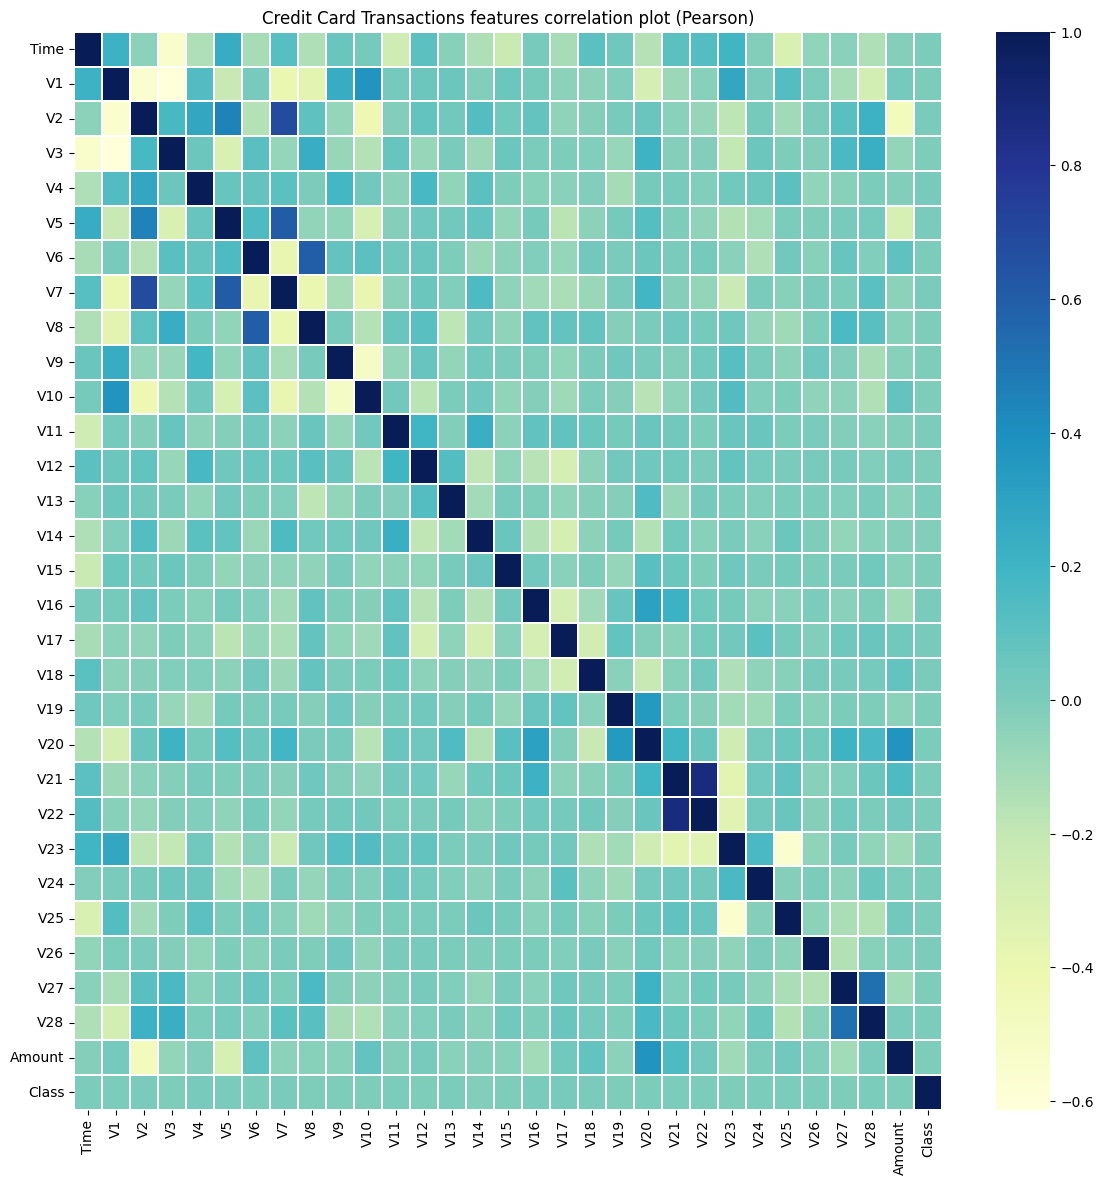

In [ ]:
plt.figure(figsize = (14,14))
plt.title('Credit Card Transactions features correlation plot (Pearson)')
corr = df_out.corr()
sns.heatmap(corr,xticklabels=corr.columns,yticklabels=corr.columns,linewidths=.1 , cmap="YlGnBu")
plt.show()

In [ ]:
df_out.columns.values

array(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9',
       'V10', 'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18',
       'V19', 'V20', 'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27',
       'V28', 'Amount', 'Class'], dtype=object)

In [ ]:
import warnings

warnings.filterwarnings("ignore")

<Figure size 640x480 with 0 Axes>

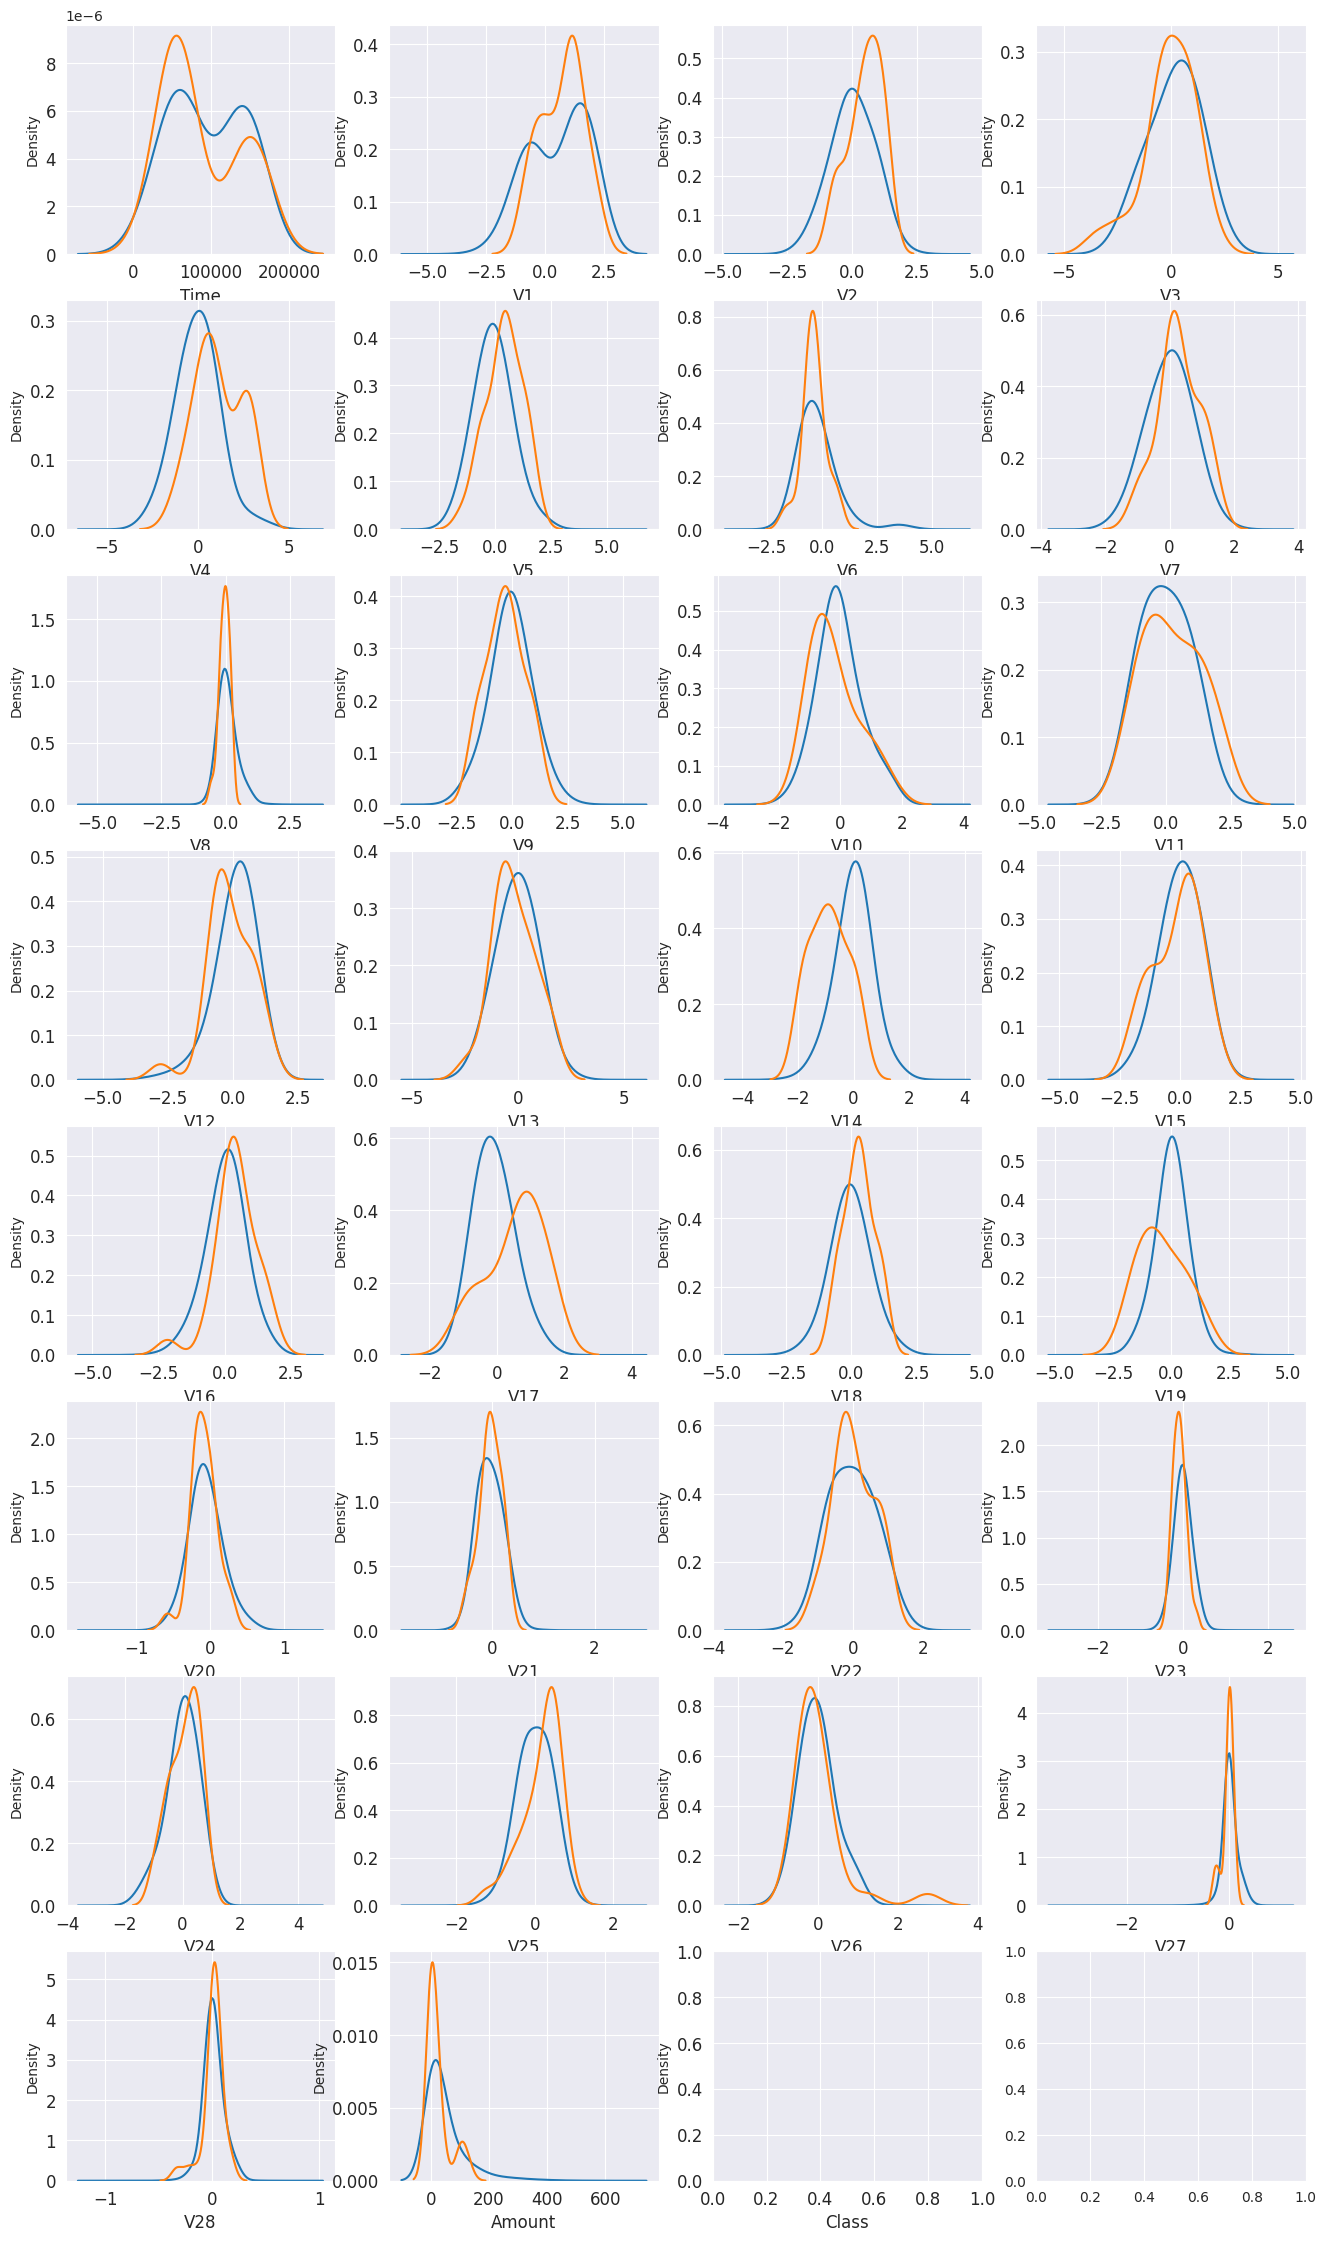

In [ ]:
var = df_out.columns.values

i = 0
t0 = df_out.loc[df_out['Class'] == 0]
t1 = df_out.loc[df_out['Class'] == 1]

sns.set_style('darkgrid')
plt.figure()
fig, ax = plt.subplots(8,4,figsize=(16,28))

for feature in var:
    i += 1
    plt.subplot(8,4,i)
    sns.kdeplot(t0[feature], bw=0.5,label="Class = 0",palette = 'YlGnBu')
    sns.kdeplot(t1[feature], bw=0.5,label="Class = 1")
    plt.xlabel(feature, fontsize=12)
    locs, labels = plt.xticks()
    plt.tick_params(axis='both', which='major', labelsize=12)
plt.show();

In [ ]:
## Transactions in time

class_0 = fraud_df.loc[fraud_df['Class'] == 0]["Time"]
class_1 = fraud_df.loc[fraud_df['Class'] == 1]["Time"]
hist_data = [class_0, class_1]
group_labels = ['Not Fraud', 'Fraud']

fig = ff.create_distplot(hist_data, group_labels, show_hist=False, show_rug=False)
fig['layout'].update(title='Credit Card Transactions Time Density Plot', xaxis=dict(title='Time [s]'))
iplot(fig, filename='dist_only')

In [ ]:
fraud_df['Hour'] = fraud_df['Time'].apply(lambda x : np.floor(x/3600))
edadf = pd.DataFrame(fraud_df.groupby(['Hour','Class'])['Amount'].aggregate(['min','max','count','sum','mean','median','var']).reset_index())
edadf.head()

,Hour,Class,min,max,count,sum,mean,median,var
0,0.0,0,0.0,7712.43,3961,256572.87,64.774772,12.990,45615.821201
1,0.0,1,0.0,529.00,2,529.00,264.500000,264.500,139920.500000
2,1.0,0,0.0,1769.69,2215,145806.76,65.826980,22.820,20053.615770
3,1.0,1,59.0,239.93,2,298.93,149.465000,149.465,16367.832450
4,2.0,0,0.0,4002.88,1555,106989.39,68.803466,17.900,45355.430437


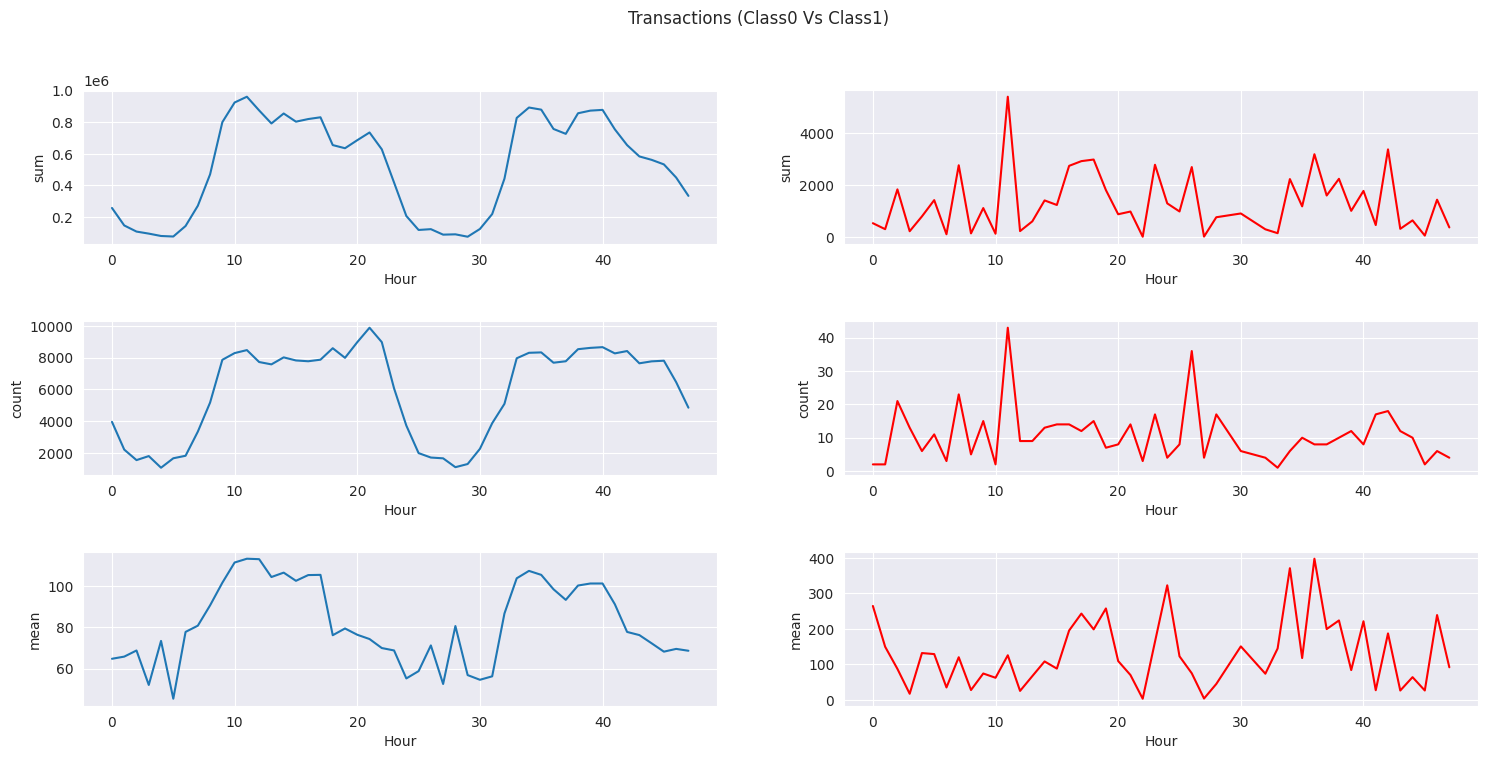

In [ ]:
fig , ax = plt.subplots(nrows = 3,ncols = 2 , figsize = (18,8) , gridspec_kw={'hspace': 0.5})
plt.suptitle('Transactions (Class0 Vs Class1)')

sns.lineplot(ax = ax[0,0]  , x = 'Hour' , y = 'sum' , data = edadf.loc[edadf.Class==0],)
sns.lineplot(ax = ax[0,1] , x = 'Hour' , y = 'sum',data = edadf.loc[edadf.Class == 1],color = "red")

sns.lineplot(ax = ax[1,0]  ,  x="Hour", y= 'count' , data = edadf.loc[edadf.Class==0])
sns.lineplot(ax = ax[1,1] , x = 'Hour' , y = 'count',data = edadf.loc[edadf.Class == 1],color = "red")

sns.lineplot(ax = ax[2,0]  , x = 'Hour' , y = 'mean' , data = edadf.loc[edadf.Class==0])
sns.lineplot(ax = ax[2,1] , x = 'Hour' , y = 'mean',data = edadf.loc[edadf.Class == 1],color = "red")

#plt.suptitle("Total Amount")
plt.show()


In [ ]:
X = df_out.drop('Class',axis = 1)
y = df_out['Class']

X_train, X_test , y_train , y_test = train_test_split(X,y,train_size = 0.7 ,random_state = 42)

<Figure size 1000x500 with 0 Axes>

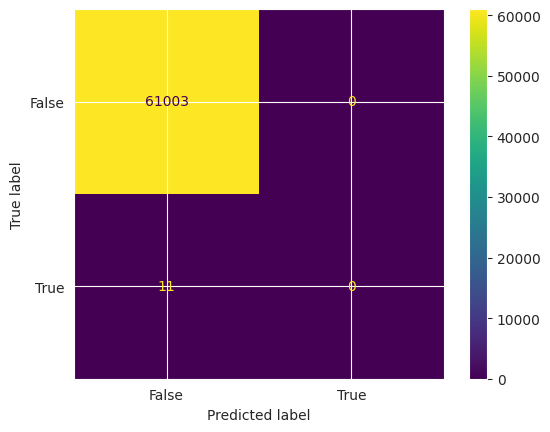

In [ ]:
clf = RandomForestClassifier(n_jobs=5,
                             random_state= 42 ,
                             n_estimators=100,
                             verbose=False)


clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
from sklearn import metrics
from sklearn.metrics import confusion_matrix
confusion_matrix =confusion_matrix(y_test, y_pred)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])
plt.figure(figsize = (10,5))
cm_display.plot()
plt.show()


In [ ]:
#XGB
# Create an XGBoost model
xgb_model = xgb.XGBClassifier( objective ='binary:logistic', max_depth = 3,  learning_rate = 0.01,   n_estimators = 100 )

# Train the model
xgb_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = xgb_model.predict(X_test)

<Figure size 1000x500 with 0 Axes>

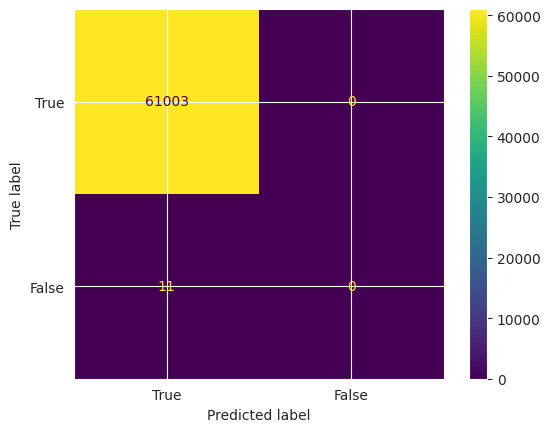

In [ ]:
import numpy as np
from sklearn import metrics
from sklearn.metrics import confusion_matrix
conf_mat = confusion_matrix( y_test , y_pred )
disp = metrics.ConfusionMatrixDisplay(conf_mat,display_labels = [True,False])
plt.figure(figsize = (10,5))
disp.plot()
plt.show()

In [ ]:
train_df, test_df = train_test_split(fraud_df, test_size=0.2, random_state=42, shuffle=True )
train_df, valid_df = train_test_split(train_df, test_size=0.3, random_state=42, shuffle=True )
target = 'Class'
predictors = ['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',\
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19',\
       'V20', 'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28',\
       'Amount']

In [ ]:
# Random Forest Classifier
clf = RandomForestClassifier(n_jobs=5,
                             random_state=42,
                             criterion='gini',
                             n_estimators=100,
                             verbose=False)
clf.fit(train_df[predictors], train_df[target].values)
preds = clf.predict(valid_df[predictors])

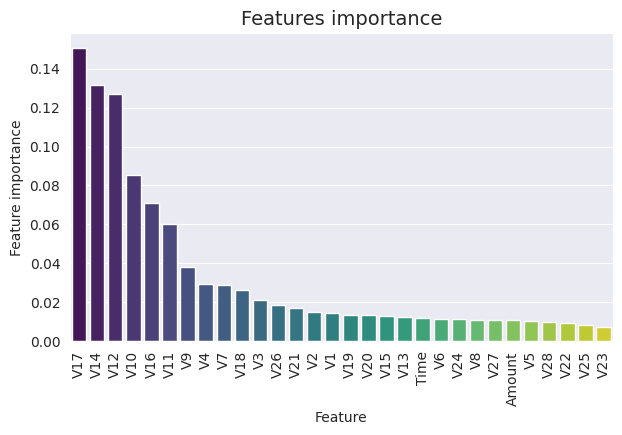

In [ ]:
### Feature Importance

tmp = pd.DataFrame({'Feature': predictors, 'Feature importance': clf.feature_importances_})
tmp = tmp.sort_values(by='Feature importance',ascending=False)
plt.figure(figsize = (7,4))
plt.title('Features importance',fontsize=14)
s = sns.barplot(x='Feature',y='Feature importance',data=tmp,palette = 'viridis')
s.set_xticklabels(s.get_xticklabels(),rotation=90)
plt.show()


<Figure size 1000x500 with 0 Axes>

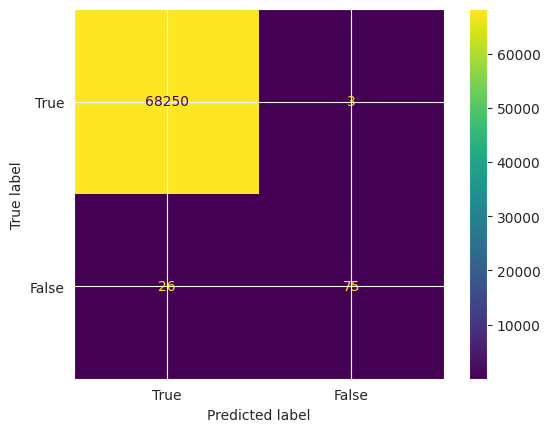

In [ ]:
conf_mat = confusion_matrix(valid_df[target], preds )
disp = metrics.ConfusionMatrixDisplay(conf_mat,display_labels = [True,False])
plt.figure(figsize = (10,5))
disp.plot()
plt.show()

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

accuracy = accuracy_score(valid_df[target] , preds)
precision = precision_score(valid_df[target] , preds)
recall = recall_score(valid_df[target] , preds)
f1 = f1_score(valid_df[target] , preds)

new_row = {'model':'RF','accuracy':accuracy , 'precision':precision,'recall':recall ,'f1': f1 }
print(new_row)

{'model': 'RF', 'accuracy': 0.9995757380694619, 'precision': 0.9615384615384616, 'recall': 0.7425742574257426, 'f1': 0.8379888268156425}


<Figure size 1000x500 with 0 Axes>

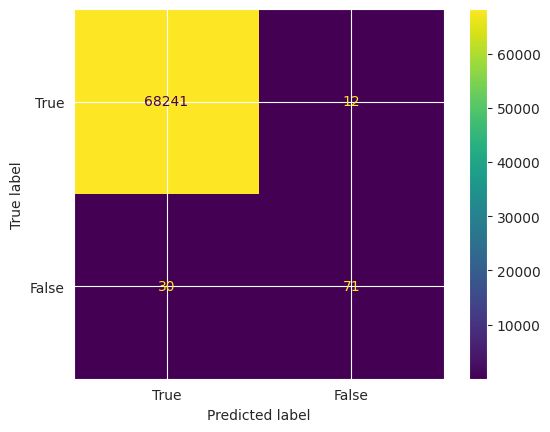

In [ ]:
# Create an XGBoost model
xgb_model = xgb.XGBClassifier( objective ='binary:logistic', max_depth = 3,  learning_rate = 0.01,   n_estimators = 100 )

# Train the model
xgb_model.fit(train_df[predictors], train_df[target].values)

# Make predictions on the test set
y_pred = xgb_model.predict(valid_df[predictors])

conf_mat = confusion_matrix( valid_df[target] , y_pred )
disp = metrics.ConfusionMatrixDisplay(conf_mat,display_labels = [True,False])
plt.figure(figsize = (10,5))
disp.plot()
plt.show()

In [ ]:
accuracy = accuracy_score(valid_df[target] , y_pred)
precision = precision_score(valid_df[target] , y_pred)
recall = recall_score(valid_df[target] , y_pred)
f1 = f1_score(valid_df[target] , y_pred)

new_row = {'model':'XGB','accuracy':accuracy , 'precision':precision,'recall':recall ,'f1': f1 }
print(new_row)

{'model': 'XGB', 'accuracy': 0.9993855516868069, 'precision': 0.8554216867469879, 'recall': 0.7029702970297029, 'f1': 0.7717391304347826}


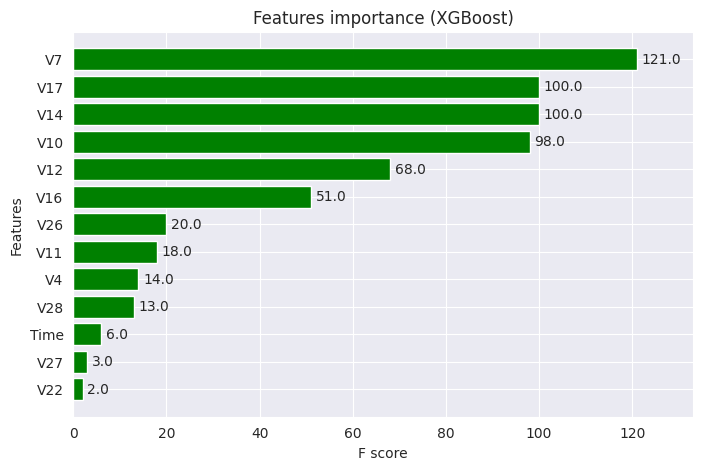

In [ ]:
fig, (ax) = plt.subplots(ncols=1, figsize=(8,5))
xgb.plot_importance(xgb_model, height=0.8, title="Features importance (XGBoost)", ax=ax, color="green")
plt.show()

<Figure size 1000x500 with 0 Axes>

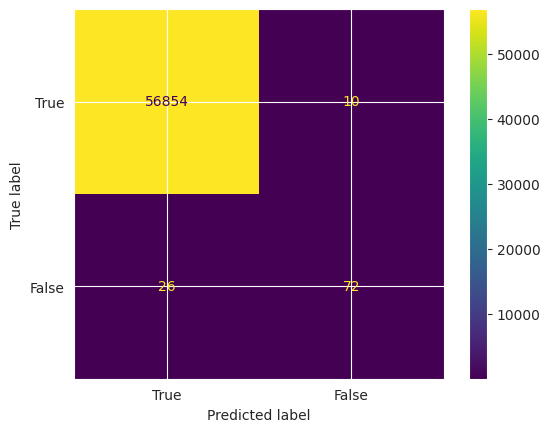

{'model': 'XGB', 'accuracy': 0.9993679997191109, 'precision': 0.8780487804878049, 'recall': 0.7346938775510204, 'f1': 0.8}


In [ ]:
# Make predictions on the test set
y_pred = xgb_model.predict(test_df[predictors])

conf_mat = confusion_matrix( test_df[target] , y_pred )
disp = metrics.ConfusionMatrixDisplay(conf_mat,display_labels = [True,False])
plt.figure(figsize = (10,5))
disp.plot()
plt.show()

accuracy = accuracy_score(test_df[target] , y_pred)
precision = precision_score(test_df[target] , y_pred)
recall = recall_score(test_df[target] , y_pred)
f1 = f1_score(test_df[target] , y_pred)

new_row = {'model':'XGB','accuracy':accuracy , 'precision':precision,'recall':recall ,'f1': f1 }
print(new_row)

In [8]:
!git config --global user.name "Styrish"

In [12]:
!git clone https://github.com/Styrish/Credit-Card-Fraud-Detection-and-Analysis.git

fatal: destination path 'Credit-Card-Fraud-Detection-and-Analysis' already exists and is not an empty directory.


In [13]:
%cd credit-card-fraud-detection

[Errno 2] No such file or directory: 'credit-card-fraud-detection'
/content
